# testGCFBv211

In [1]:
# -*- coding: utf-8 -*-
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import utils
import GCFBv211 as gcfb_Main
import scipy.io as sio

In [2]:
class GCparam_default:
    fs = 48000
    NumCh = 100
    FRange = np.array([100, 6000])
    OutMidCrct = "No"

In [3]:
# Stiuli : a simple pulse train
fs = 48000
Tp = 10 # (ms) 100 Hz pulse train
Snd = np.array(([1]+[0]*int(Tp*fs/1000-1))*10)
Tsnd = len(Snd)/fs
print("Duration of sound = {} (ms)".format(Tsnd*1000))

Duration of sound = 100.0 (ms)


## Input level: SPL 40 dB

In [4]:
SigSPL = 40
GCparam_Ctrl = 'dynamic'

In [5]:
# Level equalization
Snd, _ = utils.Eqlz2MeddisHCLevel(Snd, SigSPL)

# GCFB
GCparam = GCparam_default() # reset all
GCparam.Ctrl = GCparam_Ctrl
cGCout, pGCout, GCparam, GCrest = gcfb_Main.GCFBv211(Snd, GCparam)

*** No Outer/Middle Ear correction ***
*** Gammachirp Calculation ***
--- Channel-by-channel processing ---
Passive-Gammachirp & Level estimation filter ch #1 / #100.   elapsed time = 0.0 (sec)
Passive-Gammachirp & Level estimation filter ch #20 / #100.   elapsed time = 0.1 (sec)
Passive-Gammachirp & Level estimation filter ch #40 / #100.   elapsed time = 0.2 (sec)
Passive-Gammachirp & Level estimation filter ch #60 / #100.   elapsed time = 0.3 (sec)
Passive-Gammachirp & Level estimation filter ch #80 / #100.   elapsed time = 0.4 (sec)
Passive-Gammachirp & Level estimation filter ch #100 / #100.   elapsed time = 0.4 (sec)
--- Sample-by-sample processing ---
ACFilterBank: Initialization of ACFstatus
Dynamic Compressive-Gammachirp: Time 0.0 (ms) / 100.0 (ms). elapsed time = 0.0 (sec)
Dynamic Compressive-Gammachirp: Time 10.0 (ms) / 100.0 (ms). elapsed time = 1.8 (sec)
Dynamic Compressive-Gammachirp: Time 20.0 (ms) / 100.0 (ms). elapsed time = 2.8 (sec)
Dynamic Compressive-Gammachirp: Tim

In [6]:
# read original outputs
name_file = "./original/GCFBv211_GCout_{}_{}dBSPL.mat".format(GCparam.Ctrl, SigSPL)
name_file
GCout_org = sio.loadmat(name_file)

In [7]:
# cGCout
cGCout_org = GCout_org['cGCout']
rmse = utils.rms(cGCout_org - cGCout)
print(f'Error: {rmse}')

Error: 4.1141334993690446e-14


In [8]:
# pGCout
pGCout_org = GCout_org['pGCout']
rmse = utils.rms(pGCout_org - pGCout)
print(f'Error: {rmse}')

Error: 1.0984229101280746e-14


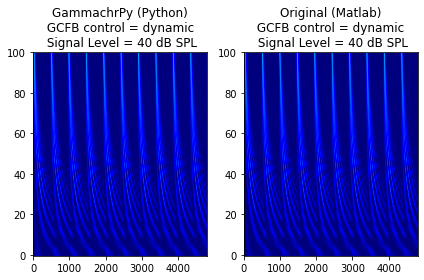

In [9]:
# GammachirPy (Python)
ax = plt.subplot(1, 2, 1)
plt.imshow(np.maximum(cGCout, 0), aspect='auto', origin='lower', cmap='jet')
ax.set_title("GammachrPy (Python)\n GCFB control = {} \n Signal Level = {} dB SPL".format(GCparam.Ctrl, SigSPL))
ax.set_yticks([0, 20, 40, 60, 80, 100])

# Original (Matlab)
ax = plt.subplot(1, 2, 2)
plt.imshow(np.maximum(cGCout_org, 0), aspect='auto', origin='lower', cmap='jet')
ax.set_title("Original (Matlab)\n GCFB control = {} \n Signal Level = {} dB SPL".format(GCparam.Ctrl, SigSPL))
ax.set_yticks([0, 20, 40, 60, 80, 100])

plt.tight_layout()

In [10]:
SigSPL = 60
GCparam_Ctrl = 'dynamic'

In [11]:
# Level equalization
Snd, _ = utils.Eqlz2MeddisHCLevel(Snd, SigSPL)

# GCFB
GCparam = GCparam_default() # reset all
GCparam.Ctrl = GCparam_Ctrl
cGCout, pGCout, GCparam, GCrest = gcfb_Main.GCFBv211(Snd, GCparam)

*** No Outer/Middle Ear correction ***
*** Gammachirp Calculation ***
--- Channel-by-channel processing ---
Passive-Gammachirp & Level estimation filter ch #1 / #100.   elapsed time = 0.0 (sec)
Passive-Gammachirp & Level estimation filter ch #20 / #100.   elapsed time = 0.2 (sec)
Passive-Gammachirp & Level estimation filter ch #40 / #100.   elapsed time = 0.3 (sec)
Passive-Gammachirp & Level estimation filter ch #60 / #100.   elapsed time = 0.3 (sec)
Passive-Gammachirp & Level estimation filter ch #80 / #100.   elapsed time = 0.4 (sec)
Passive-Gammachirp & Level estimation filter ch #100 / #100.   elapsed time = 0.4 (sec)
--- Sample-by-sample processing ---
ACFilterBank: Initialization of ACFstatus
Dynamic Compressive-Gammachirp: Time 0.0 (ms) / 100.0 (ms). elapsed time = 0.0 (sec)
Dynamic Compressive-Gammachirp: Time 10.0 (ms) / 100.0 (ms). elapsed time = 1.6 (sec)
Dynamic Compressive-Gammachirp: Time 20.0 (ms) / 100.0 (ms). elapsed time = 2.8 (sec)
Dynamic Compressive-Gammachirp: Tim

In [12]:
# read original outputs
name_file = "./original/GCFBv211_GCout_{}_{}dBSPL.mat".format(GCparam.Ctrl, SigSPL)
name_file
GCout_org = sio.loadmat(name_file)

In [13]:
# cGCout
cGCout_org = GCout_org['cGCout']
rmse = utils.rms(cGCout_org - cGCout)
print(f'Error: {rmse}')

Error: 2.2186499667485491e-13


In [14]:
# pGCout
pGCout_org = GCout_org['pGCout']
rmse = utils.rms(pGCout_org - pGCout)
print(f'Error: {rmse}')

Error: 1.0983178981350143e-13


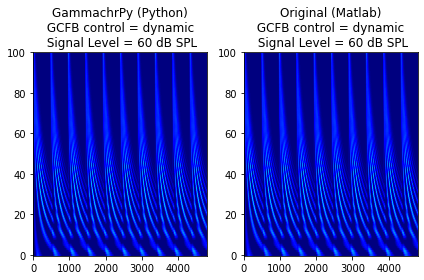

In [15]:
# GammachirPy (Python)
ax = plt.subplot(1, 2, 1)
plt.imshow(np.maximum(cGCout, 0), aspect='auto', origin='lower', cmap='jet')
ax.set_title("GammachrPy (Python)\n GCFB control = {} \n Signal Level = {} dB SPL".format(GCparam.Ctrl, SigSPL))
ax.set_yticks([0, 20, 40, 60, 80, 100])

# Original (Matlab)
ax = plt.subplot(1, 2, 2)
plt.imshow(np.maximum(cGCout_org, 0), aspect='auto', origin='lower', cmap='jet')
ax.set_title("Original (Matlab)\n GCFB control = {} \n Signal Level = {} dB SPL".format(GCparam.Ctrl, SigSPL))
ax.set_yticks([0, 20, 40, 60, 80, 100])

plt.tight_layout()

In [16]:
SigSPL = 80
GCparam_Ctrl = 'dynamic'

In [17]:
# Level equalization
Snd, _ = utils.Eqlz2MeddisHCLevel(Snd, SigSPL)

# GCFB
GCparam = GCparam_default() # reset all
GCparam.Ctrl = GCparam_Ctrl
cGCout, pGCout, GCparam, GCrest = gcfb_Main.GCFBv211(Snd, GCparam)

*** No Outer/Middle Ear correction ***
*** Gammachirp Calculation ***
--- Channel-by-channel processing ---
Passive-Gammachirp & Level estimation filter ch #1 / #100.   elapsed time = 0.0 (sec)
Passive-Gammachirp & Level estimation filter ch #20 / #100.   elapsed time = 0.2 (sec)
Passive-Gammachirp & Level estimation filter ch #40 / #100.   elapsed time = 0.3 (sec)
Passive-Gammachirp & Level estimation filter ch #60 / #100.   elapsed time = 0.5 (sec)
Passive-Gammachirp & Level estimation filter ch #80 / #100.   elapsed time = 0.5 (sec)
Passive-Gammachirp & Level estimation filter ch #100 / #100.   elapsed time = 0.7 (sec)
--- Sample-by-sample processing ---
ACFilterBank: Initialization of ACFstatus
Dynamic Compressive-Gammachirp: Time 0.0 (ms) / 100.0 (ms). elapsed time = 0.0 (sec)
Dynamic Compressive-Gammachirp: Time 10.0 (ms) / 100.0 (ms). elapsed time = 1.4 (sec)
Dynamic Compressive-Gammachirp: Time 20.0 (ms) / 100.0 (ms). elapsed time = 2.2 (sec)
Dynamic Compressive-Gammachirp: Tim

In [18]:
name_file = "./original/GCFBv211_GCout_{}_{}dBSPL.csv".format(GCparam.Ctrl, SigSPL)
name_file

'./original/GCFBv211_GCout_dynamic_80dBSPL.csv'

In [19]:
# read original outputs
name_file = "./original/GCFBv211_GCout_{}_{}dBSPL.mat".format(GCparam.Ctrl, SigSPL)
name_file
GCout_org = sio.loadmat(name_file)

In [20]:
# cGCout
cGCout_org = GCout_org['cGCout']
rmse = utils.rms(cGCout_org - cGCout)
print(f'Error: {rmse}')

Error: 1.7493983642764924e-12


In [21]:
# pGCout
pGCout_org = GCout_org['pGCout']
rmse = utils.rms(pGCout_org - pGCout)
print(f'Error: {rmse}')

Error: 1.09852400133016e-12


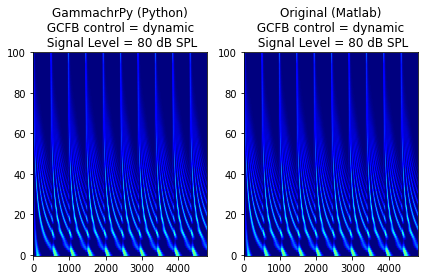

In [22]:
# GammachirPy (Python)
ax = plt.subplot(1, 2, 1)
plt.imshow(np.maximum(cGCout, 0), aspect='auto', origin='lower', cmap='jet')
ax.set_title("GammachrPy (Python)\n GCFB control = {} \n Signal Level = {} dB SPL".format(GCparam.Ctrl, SigSPL))
ax.set_yticks([0, 20, 40, 60, 80, 100])

# Original (Matlab)
ax = plt.subplot(1, 2, 2)
plt.imshow(np.maximum(cGCout_org, 0), aspect='auto', origin='lower', cmap='jet')
ax.set_title("Original (Matlab)\n GCFB control = {} \n Signal Level = {} dB SPL".format(GCparam.Ctrl, SigSPL))
ax.set_yticks([0, 20, 40, 60, 80, 100])

plt.tight_layout()